# Simple Linear Regression from scratch
*This notebook was created on 26/08/2021*
- In this notebook, I defined a Linear Regression Object (Class) from scratch (without using any predefined model from any library like scikit-learn, tensorflow or keras).
- I built this based on what I remember from the **Logistic Regresisson Model from Scratch** I learnt from Mr.Andrew Ng on Coursera.

## Import Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Make an artificial dataset

In [2]:
# Define expected Function
X = 3 * np.random.rand(100, 1)
y = 3 + 5 * X + np.random.randn(100, 1)

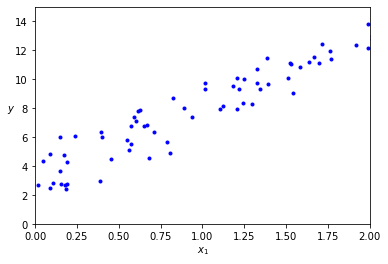

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

## Model Definition

In [4]:
class MyLinearModel:
    def __init__(self, dims, learning_rate=0.05, n_estimators=100):
        self.dims = dims
        self.params = self.initial_parameters(self.dims)
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
    
    def initial_parameters(self, dims):
        dims = dims + [1]
        params = {}
        for i in range(1, len(dims)):
            params['W'] = np.random.rand(dims[i], dims[i-1])
            params['b'] = np.zeros((dims[i], dims[i-1]))
        return params
    
    def forward_propagation(self, X):
        params = self.params
        y_hat = np.dot(X, params['W']) + params['b']
        return y_hat
    
    def backward_propagation(self, X, y, y_hat):
        grads = {}
        m = X.shape[0]
        
        grads['dW'] = 2/m * np.dot((y_hat - y).T, X)
        grads['db'] = 2/m * np.sum(y_hat-y)
        return grads
    
    def update_params(self, grads):
        learning_rate=self.learning_rate
        params = self.params
        params['W'] = params['W'] - learning_rate*grads['dW']
        params['b'] = params['b'] - learning_rate*grads['db']
        return params
    
    def compute_cost(self, y, y_hat):
        m = y.shape[0]
        cost = 1/m * np.sum((y_hat - y) * (y_hat - y))
        return cost
    
    def fit(self, X, y):
        for i in range(self.n_estimators):
            print(i)
            y_hat = self.forward_propagation(X)
            curr_cost = self.compute_cost(y, y_hat)
            grads = self.backward_propagation(X, y, y_hat)
            
            self.params = self.update_params(grads)
            
            print('After {} estimators, Cost: {}'.format(i, curr_cost))
            
    def predict(self, X):
        return X * self.params['W'] + self.params['b']

## Create a Linear Model
- Dims = [1] because it only have 1 features and 1 layer.
- I use List for dims because I want it to has more than 1 layer (which is not Linear Regression anymore).

In [5]:
# Create a new Model
linear_model = MyLinearModel(dims=[1])

# Fit the model into our Dataset
linear_model.fit(X, y)

0
After 0 estimators, Cost: 111.73671043647195
1
After 1 estimators, Cost: 44.2853570340596
2
After 2 estimators, Cost: 17.994948835997718
3
After 3 estimators, Cost: 7.745850501702356
4
After 4 estimators, Cost: 3.7484817522763003
5
After 5 estimators, Cost: 2.1876608095509344
6
After 6 estimators, Cost: 1.5765367323283377
7
After 7 estimators, Cost: 1.3356512504062557
8
After 8 estimators, Cost: 1.2391735900088348
9
After 9 estimators, Cost: 1.1990882131650578
10
After 10 estimators, Cost: 1.1810888872250802
11
After 11 estimators, Cost: 1.171801080822493
12
After 12 estimators, Cost: 1.1660079323853425
13
After 13 estimators, Cost: 1.1616719711137333
14
After 14 estimators, Cost: 1.1579949833255143
15
After 15 estimators, Cost: 1.1546618990863564
16
After 16 estimators, Cost: 1.1515461132103177
17
After 17 estimators, Cost: 1.1485946358862609
18
After 18 estimators, Cost: 1.1457833264802413
19
After 19 estimators, Cost: 1.1430994403335062
20
After 20 estimators, Cost: 1.140534820233

## Check the Model by Visualization
- Plot the Dataset in Scatter Plot with a Model Linear Line

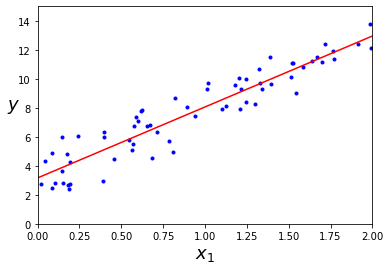

In [6]:
# Load Model's trained Parameters to plot it with the 
W = linear_model.params['W']
b = linear_model.params['b']
X_model = np.linspace(0, 2, 100).reshape(100, 1) # use X_model to plot the line "naturally" :)

plt.plot(X, y, "b.")
plt.plot(X_model, W*X_model + b, c="r")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Conclusion

- This is just really simple Model I want to build to comprehend what I have learnt so far and understand everything from the ground.
- An easy one but "hard enough" to made me spent half of today building this :)